In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv


In [82]:
fileWaterTemp = "data/nwis.waterdata.usgs.gov.csv"

dataPath = pd.read_csv(fileWaterTemp)

temp_1_df = pd.DataFrame(dataPath[28:])

temp_1_df = temp_1_df.rename(columns={"# ---------------------------------- WARNING ----------------------------------------":"Outfit",
                                     "Unnamed: 1": "Station ID",
                                     "Unnamed: 2": "Date/Time",
                                     "Unnamed: 3": "Timezone",
                                     "Unnamed: 4": "Temperature C",
                                     "Unnamed: 5": "Approval Code"}) 




new = temp_1_df["Date/Time"].str.split(" ", n=1, expand = True)

temp_1_df["Date"]= new[0]
temp_1_df["Time"]= new[1]

temp_1_df.drop(columns = ["Date/Time"], inplace = True)

temp_1_df['Date'] = pd.to_datetime(temp_1_df['Date']).dt.strftime('%Y/%m/%d')

In [83]:
temp_1_df["Date"]

28        2007/10/01
29        2007/10/01
30        2007/10/01
31        2007/10/01
32        2007/10/01
             ...    
109997    2020/04/20
109998    2020/04/20
109999    2020/04/20
110000    2020/04/20
110001    2020/04/20
Name: Date, Length: 109974, dtype: object

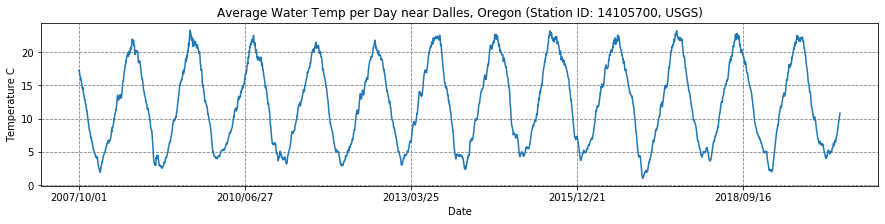

In [84]:

temp_1_df["Temperature C"] = temp_1_df["Temperature C"].astype(float)

eventDate = temp_1_df.groupby("Date")

dayAverageTemp = eventDate["Temperature C"].mean()

eventDate_df = pd.DataFrame({"Average Temperature": dayAverageTemp})

eventDate_df['Date'] = eventDate_df.index


eventDate_df.plot(kind="line", figsize=(15,3), legend=False)
plt.ylabel('Temperature C')
plt.title('Average Water Temp per Day near Dalles, Oregon (Station ID: 14105700, USGS)')
plt.grid(b=True, which='major', color='grey', linestyle='--')

#plt.savefig("data/waterTemperatureChart.png")



In [111]:
newDate_df = pd.DataFrame({})

newDate_df['Date'] = eventDate_df.index



(0, 4811.1)

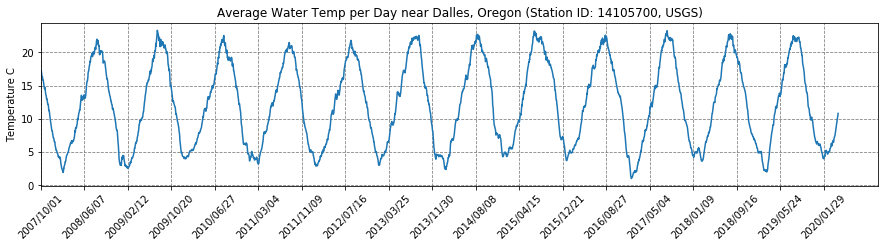

In [145]:
x_axisTemp = np.arange(len(newDate_df))
tick_locations = [value for value in x_axisTemp]

xtick = []
xdate = []

#Hardcoded after finding from printing xdate, yuck
xlistDate = ["2007/10/01", "2008/06/07", "2009/02/12", "2009/10/20", "2010/06/27",
             "2011/03/04", "2011/11/09", "2012/07/16", "2013/03/25", "2013/11/30", 
             "2014/08/08", "2015/04/15", "2015/12/21", "2016/08/27", "2017/05/04", 
             "2018/01/09", "2018/09/16", "2019/05/24", "2020/01/29"]

for row in tick_locations:
    xtick.append(tick_locations[row]*250)
  
    #I want to use the value i get from xtick as an index value to pull from a dataframe to create a new list of dates
    xdate.append(newDate_df.take([row*250]))
    #xdate.append(newDate_df.iloc[(row*250),0].values)
    
    if xtick[row] >= 4500:
        break
next


plt.figure(figsize=(15,3))
plt.plot(x_axisTemp, eventDate_df["Average Temperature"])
plt.xticks(xtick, xlistDate, rotation=45)
#plt.xticks(xtick, rotation=45)

plt.ylabel('Temperature C')
plt.title('Average Water Temp per Day near Dalles, Oregon (Station ID: 14105700, USGS)')
plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.xlim(0)

In [103]:
print(xtick)

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500]


In [143]:
print(xdate)

[         Date
0  2007/10/01,            Date
250  2008/06/07,            Date
500  2009/02/12,            Date
750  2009/10/20,             Date
1000  2010/06/27,             Date
1250  2011/03/04,             Date
1500  2011/11/09,             Date
1750  2012/07/16,             Date
2000  2013/03/25,             Date
2250  2013/11/30,             Date
2500  2014/08/08,             Date
2750  2015/04/15,             Date
3000  2015/12/21,             Date
3250  2016/08/27,             Date
3500  2017/05/04,             Date
3750  2018/01/09,             Date
4000  2018/09/16,             Date
4250  2019/05/24,             Date
4500  2020/01/29]
